In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
df = pd.read_csv("co2-concentration-long-term.csv")

The dataframe contains data from 803719 BCE to 2018. In this Project, we are interested in data from world war 2 era onwards 

In [78]:
df = df[df["Year"]>1940]
        

In [79]:
df.head()

,Entity,Code,Year,"CO2 concentrations (NOAA, 2018)"
1796,World,OWID_WRL,1941,309.77
1797,World,OWID_WRL,1942,312.37
1798,World,OWID_WRL,1944,312.36
1799,World,OWID_WRL,1945,310.94
1800,World,OWID_WRL,1946,312.26


In [80]:
df = df.set_index("Year")

In [81]:
df.index = pd.to_datetime(df.index, format = "%Y")

In [82]:
df.head()

,Entity,Code,"CO2 concentrations (NOAA, 2018)"
Year,,,
1941-01-01,World,OWID_WRL,309.77
1942-01-01,World,OWID_WRL,312.37
1944-01-01,World,OWID_WRL,312.36
1945-01-01,World,OWID_WRL,310.94
1946-01-01,World,OWID_WRL,312.26


In [83]:
df = df.rename(columns = {"CO2 concentrations (NOAA, 2018)": "CO2 PPM"})

In [84]:
df.head()

,Entity,Code,CO2 PPM
Year,,,
1941-01-01,World,OWID_WRL,309.77
1942-01-01,World,OWID_WRL,312.37
1944-01-01,World,OWID_WRL,312.36
1945-01-01,World,OWID_WRL,310.94
1946-01-01,World,OWID_WRL,312.26


In [85]:
df.drop(["Entity","Code"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Trend of annual CO2 Atmospheric Concentration (PPM) from 1940s to 2018')

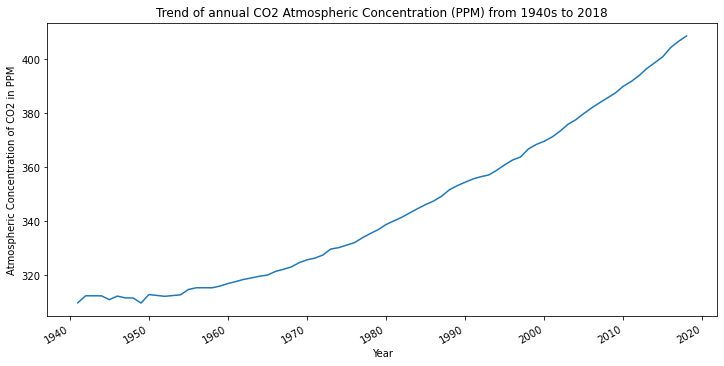

In [180]:
df["CO2 PPM"].plot(figsize = (12,6))
plt.ylabel("Atmospheric Concentration of CO2 in PPM")
plt.title("Trend of annual CO2 Atmospheric Concentration (PPM) from 1940s to 2018")

Visually, the time series is not weakly stationary

In [87]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["CO2 PPM"])
print("P-value of the time series ADF Test = ", adfuller(df["CO2 PPM"])[1])

P-value of the time series ADF Test =  1.0


In [88]:
ddiff = df.diff(periods = 1)

In [89]:
ddiff = ddiff[1:]
ddiff.head()

,CO2 PPM
Year,
1942-01-01,2.60
1944-01-01,-0.01
1945-01-01,-1.42
1946-01-01,1.32
1947-01-01,-0.65


<AxesSubplot:xlabel='Year'>

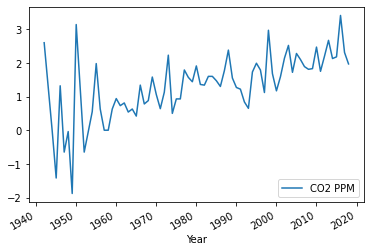

In [90]:
ddiff.plot()

In [91]:
adfuller(ddiff)

(-0.8503889237444548,
 0.8038709867047065,
 7,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 90.1021173086495)

even after differencing it is still not weakly stationary

In [93]:
from statsmodels.graphics.tsaplots import plot_acf

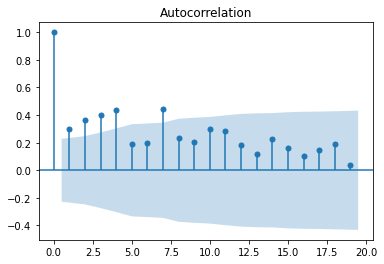

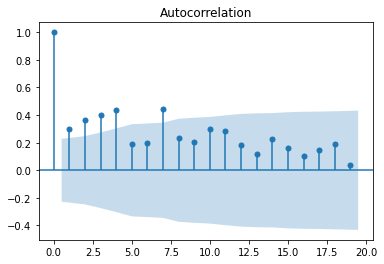

In [94]:
plot_acf(ddiff)

In [95]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


In [96]:
auto_arima(df["CO2 PPM"], trace = True,
          suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=179.075, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=226.698, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=203.250, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=180.017, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=176.672, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=176.375, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=178.014, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=178.111, Time=0.02 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=179.456, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.598 seconds


ARIMA(order=(0, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

the best model shows a differencing order of 2 and MA(2) model as it has the lowest AIC score

In [97]:
ddiff2 = df.diff(periods = 2)
ddiff2.head

<bound method NDFrame.head of             CO2 PPM
Year               
1941-01-01      NaN
1942-01-01      NaN
1944-01-01     2.59
1945-01-01    -1.43
1946-01-01    -0.10
...             ...
2014-01-01     4.80
2015-01-01     4.31
2016-01-01     5.59
2017-01-01     5.72
2018-01-01     4.28

[75 rows x 1 columns]>

In [98]:
ddiff2 = ddiff2[2:]

<AxesSubplot:xlabel='Year'>

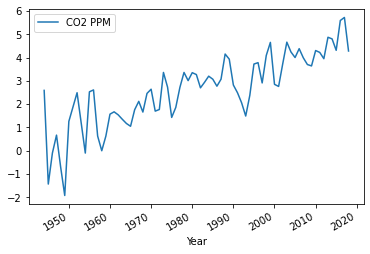

In [99]:
ddiff2.plot()

In [100]:
adfuller(ddiff2)

(-1.0512305411683072,
 0.7341238842412081,
 6,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 94.40339992164367)

Even with 2 times differencing, the time series is not weakly stationary

In [102]:
df["CO2 log"] = np.log(df["CO2 PPM"])

In [103]:
df

,CO2 PPM,CO2 log
Year,,
1941-01-01,309.77,5.735830
1942-01-01,312.37,5.744188
1944-01-01,312.36,5.744156
1945-01-01,310.94,5.739600
1946-01-01,312.26,5.743836
...,...,...
2014-01-01,398.65,5.988084
2015-01-01,400.83,5.993537
2016-01-01,404.24,6.002009


In [104]:
adfuller(df["CO2 log"])

(5.047757637378576,
 1.0,
 2,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 -640.58184033897)

In [109]:
df2 = df.diff(periods = 1)

<AxesSubplot:xlabel='Year'>

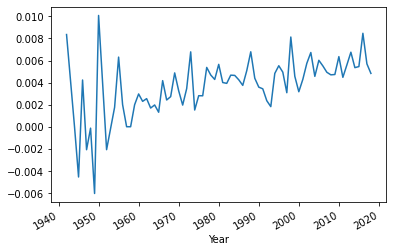

In [110]:
df2["CO2 log"].plot()

In [111]:
df2 = df2[2:]
adfuller(df2["CO2 log"])

(-2.199572007268648,
 0.20640083019902283,
 3,
 69,
 {'1%': -3.528889992207215,
  '5%': -2.9044395987933362,
  '10%': -2.589655654274312},
 -616.1494407294961)

In [115]:
df2

,CO2 PPM,CO2 log
Year,,
1944-01-01,-0.01,-0.000032
1945-01-01,-1.42,-0.004556
1946-01-01,1.32,0.004236
1947-01-01,-0.65,-0.002084
1948-01-01,-0.04,-0.000128
...,...,...
2014-01-01,2.13,0.005357
2015-01-01,2.18,0.005454
2016-01-01,3.41,0.008471


In [112]:
auto_arima(df2["CO2 log"], trace = True,
          suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-654.082, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-610.227, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-644.990, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-612.199, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-662.360, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-662.605, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-669.563, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-669.181, Time=0.39 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-663.452, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-665.563, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-669.313, Time=0.20 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 2.079 seconds


ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [119]:
train = df[:60]

In [132]:
test = df["CO2 PPM"].values[60:]
len(test)

15

In [133]:
train

,CO2 PPM,CO2 log
Year,,
1941-01-01,309.77,5.735830
1942-01-01,312.37,5.744188
1944-01-01,312.36,5.744156
1945-01-01,310.94,5.739600
1946-01-01,312.26,5.743836
1947-01-01,311.61,5.741752
1948-01-01,311.57,5.741624
1949-01-01,309.69,5.735572
1950-01-01,312.83,5.745660


In [140]:
modarima = ARIMA(train[["CO2 PPM"]], order = (0,2,2))
modfit = modarima.fit()
pred2 = modfit.forecast(steps=15)[0]

In [141]:
test

array([377.52, 379.8 , 381.9 , 383.79, 385.6 , 387.43, 389.9 , 391.65,
       393.85, 396.52, 398.65, 400.83, 404.24, 406.55, 408.52])

Text(0.5, 0, 'Time steps')

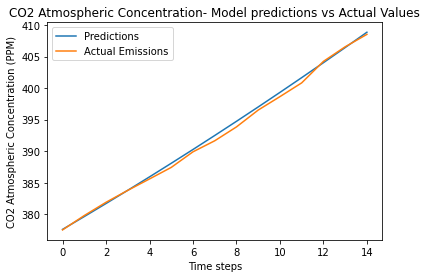

In [148]:
plt.plot(pred2, label = "Predictions")
plt.plot(test, label = "Actual Emissions")
plt.legend()
plt.title("CO2 Atmospheric Concentration- Model predictions vs Actual Values")
plt.ylabel("CO2 Atmospheric Concentration (PPM)")
plt.xlabel("Time steps")

In [143]:
pred2

array([377.60383886, 379.63935764, 381.70515783, 383.80123942,
       385.92760241, 388.08424681, 390.27117261, 392.48837982,
       394.73586843, 397.01363845, 399.32168986, 401.66002269,
       404.02863691, 406.42753255, 408.85670958])

We now fit the entire dataset to the 0,2,2 ARIMA model, and forecast 10 years into the future. 

In [172]:
mod1 = ARIMA(df[["CO2 PPM"]], order = (0,2,2))
modfit = mod1.fit()
pred = modfit.forecast(steps =12)[0]

In [173]:
pred

array([411.11311557, 413.60305889, 416.12312563, 418.6733158 ,
       421.25362938, 423.86406639, 426.50462681, 429.17531066,
       431.87611793, 434.60704862, 437.36810273, 440.15928027])

In [174]:
type(pred)

numpy.ndarray

In [175]:
index = ['2019','2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030']
df_new = pd.DataFrame(pred, columns = ['Predicted CO2 PPM'],index = index)

In [176]:
df_new.columns

Index(['Predicted CO2 PPM'], dtype='object')

In [177]:
df_new

,Predicted CO2 PPM
2019,411.113116
2020,413.603059
2021,416.123126
2022,418.673316
2023,421.253629
2024,423.864066
2025,426.504627
2026,429.175311
2027,431.876118
2028,434.607049


In [178]:
df_new.index = pd.to_datetime(df_new.index, format = "%Y")

In [181]:
df_new.head()

,Predicted CO2 PPM
2019-01-01,411.113116
2020-01-01,413.603059
2021-01-01,416.123126
2022-01-01,418.673316
2023-01-01,421.253629


 In 2019, the CO2 ppm was 411.3 +/- 0.6, and in 2020 , the CO2 ppm was 414.0 +/- 0.6. The model does well in predicting both figures within the standard deviation based on current trends. 